In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
df = pd.read_csv("../data/cleaned_reviews.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28280 entries, 0 to 28279
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              28280 non-null  object
 1   userName              28280 non-null  object
 2   userImage             28280 non-null  object
 3   content               28280 non-null  object
 4   score                 28280 non-null  int64 
 5   thumbsUpCount         28280 non-null  int64 
 6   reviewCreatedVersion  25498 non-null  object
 7   at                    28280 non-null  object
 8   replyContent          8455 non-null   object
 9   repliedAt             8455 non-null   object
 10  appVersion            25498 non-null  object
 11  cleaned_content       28196 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.6+ MB


In [16]:
# Initialize VADER
vader = SentimentIntensityAnalyzer()

# Apply VADER on clean text
df['sentiment'] = df['cleaned_content'].apply(lambda x: vader.polarity_scores(x)['compound'])

# Classify as Positive, Neutral, Negative
def get_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment'].apply(get_sentiment_label)

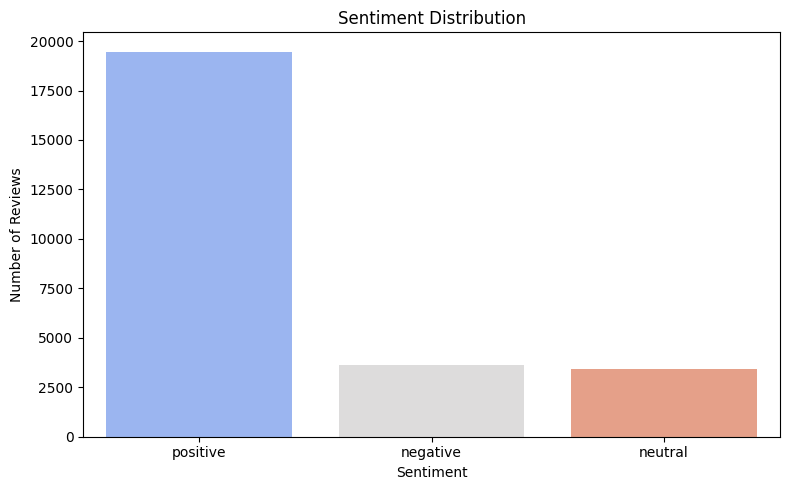

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

In [ ]:
custom_stopwords = [
    'app', 'use', 'want', 'go', 'great', 'even', 'like', 'get', 'make', 'time', 'one', 'good',
    'love', 'would', 'really', 'see', 'need', 'also', 'work', 'well', 'much', 'back', 'take',
    'new', 'first', 'best', 'find', 'help', 'say', 'come', 'look', 'way', 'thing', 'user',
    'useful', 'feature', 'function', 'appreciate', 'recommend', 'enjoy', 'experience', 'service',
    'try', 'many', 'problem', 'review', 'download', 'upload', 'download', 'work', 'watch', 'device', 
    'update', 'connect', 'feature', 'option', 'set', 'start', 'time', 'thing', 'etc', 'one', 'go', 
    'see', 'look', 'run', 'phone', 'bluetooth', 'android', 'data', 'sync', 'activity', 'not',
    'nice', 'really', 'make', 'get', 'keep', 'still', 'every', 'even', 'always', 'need', 'info',
    'awesome', 'amazing', 'trail', 'alltrail', 'bad'
]

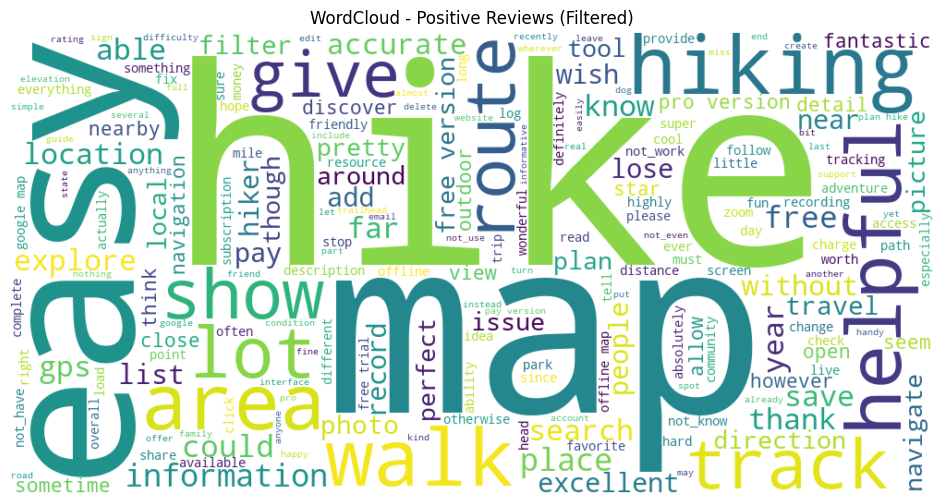

In [46]:
positive_text = " ".join(
    df[df['sentiment_label'] == 'positive']['cleaned_content'].dropna()
)

wordcloud_pos = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=custom_stopwords
).generate(positive_text)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Positive Reviews (Filtered)')
plt.show()

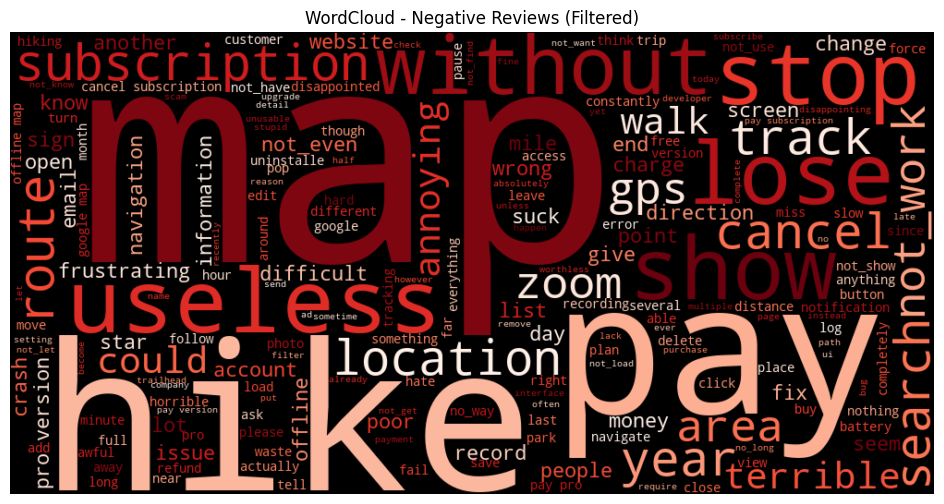

In [47]:
negative_text = " ".join(
    df[df['sentiment_label'] == 'negative']['cleaned_content'].dropna()
)

wordcloud_neg = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    colormap='Reds',
    stopwords=custom_stopwords,
).generate(negative_text)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Negative Reviews (Filtered)')
plt.show()